In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
import hist
import mplhep as hep
from TUnfold import *
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

objc[46460]: Class RunStopper is implemented in both /Users/ren/Applications/root/lib/libCore.6.28.06.so (0x108653148) and /usr/local/lib/libCore.so (0x12186a1f0). One of the two will be used. Which one is undefined.


Welcome to JupyROOT 6.28/06
0.7.21
4.3.7


In [2]:
#### open files                                                                                                                                               
# fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018RespOnly.pkl"
fname="coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_allUnc2018.pkl"
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result = pickle.load( f )
# fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5_2018.pkl"
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/trijetHists_JetHT_newpt200.0_rapidity2.5_nominal2018.pkl"
# fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
else:
    os_path = "plots/unfolding/trijet/"
checkdir(os_path)
print(year)                                                                                                                                                    
# axis_names = [ax.name for ax in result['jet_pt_mass_reco_u'].axes]
axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
print("avail hists ", result.keys())
print(axis_names)
# cats = [cat for cat in result['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
# availSysts = [ax for ax in result['jet_pt_mass_reco_u'].project("syst").axes[0]]
cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]
print("Available systs ", availSysts)
detectorBinning, generatorBinning, mreco_edges, ptreco_edges, mgen_edges, ptgen_edges = setupBinning(result)
#### for data get results once                                                                                                                            
DataReco_u, DataReco_g = fillData(result_data, detectorBinning, mreco_edges, ptreco_edges, new=True)
syst_hist_dict = {}
#hist = getHists(result, "nominal", detectorBinning, generatorBinning)                                                                                    
#syst_hist_dict["nominal"]=hist                                                                                                                           
#for syst in [syst for syst in availSysts if ("Up" in syst)]:    
for syst in availSysts:  
    # ROOT.TH1.SetDefaultSumw2(True)
    #syst = syst[:-2]                                                                                                                                     
    hist = getHists(result, syst, detectorBinning, generatorBinning, new=True)
    syst_hist_dict[syst]=hist
    print("Building respone matrices for systematic ", syst)
    #### check that response matrix has been filled properly                                                                                              
    MCReco_u_M=hist['MCGenRec_u'].ProjectionY("MCReco ungroomed")
    MCTruth_u_M=hist['MCGenRec_u'].ProjectionX("MCTruth ungroomed")
    #MCReco_u_M.Print("all")                                                                                                                              
    MCReco_g_M=hist['MCGenRec_g'].ProjectionY("MCReco groomed")
    MCTruth_g_M=hist['MCGenRec_g'].ProjectionX("MCTruth groomed")
    plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], hist['MCReco_u'], groom="ungroomed", syst=syst, year=year, ospath=os_path)
    plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], hist['MCReco_g'], groom="groomed", syst=syst, year=year, ospath=os_path)
    #### plot inputs and check that they match matrix
hist = syst_hist_dict["nominal"]
#### ADD RATIO PLOTS FOR ALL INPUT UNCERTAINTIES
# for syst in [syst for syst in availSysts if syst != "nominal"]:
#     hist = syst_hist_dict[syst]


2018
avail hists  dict_keys(['alljet_ptreco_mreco', 'btag_eta', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_phi_gen', 'jet_phi_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'misses_g', 'fakes_g', 'misses', 'fakes', 'weights', 'fakes_eta_phi', 'fakes_asymm_dphi', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'systematics'])
['syst', 'ptreco', 'mreco']
Available systs  ['PUSFUp', 'PUSFDown', 'L1prefiringDown', 'L1prefiringUp', 'nominal', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileU

Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_ungroomed_PUSFUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_groomed_PUSFUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_ungroomed_PUSFDownflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_groomed_PUSFDownflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_ungroomed_L1prefiringDownflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_groomed_L1prefiringDownflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_ungroomed_L1prefiringUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCInput_groomed_L1prefiringUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: pn

In [3]:
# if "dijet" in fname:
#     os_path = "plots/unfolding/dijet/"
# else:
#     os_path = "plots/unfolding/trijet/"
# CompareCoffeaROOT(result, syst_hist_dict, os_path)

In [4]:
# CompareCoffeaROOT(result, syst_hist_dict, os_path, groomed=True)

In [ ]:
def addAndPlotUnrolledUnc():
    

In [5]:
def plotMatrixInputs(ptbin_edges, mbin_edges, hist_list, hist_obj, os_path=os_path, norm_by_bw = True):
    for ipt in range(len(ptbin_edges)-1):
        ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
        ci.cd()
        hcopy = ROOT.TH1D("inputPt" +hist_obj+ str(ipt), "Input "+hist_obj+" pT " + str(ptbin_edges[ipt]) +" - " +str(ptbin_edges[ipt+1]), len(mbin_edges)-1, mbin_edges)
        #        hcopy.Print("all") 
        canvs = []
        hists = []
        for im in range(len(mbin_edges)):
            # print("Bin value: ", hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)), " for pt bin ", ipt, " and mass bin ", im, " ", mgen_edges[im])
            # print("Error value: ", np.sqrt(hist['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1))), " from truth bin ", im+2+ipt*(len(mgen_edges)-1))
            if hcopy.GetBinWidth(im)>0 and norm_by_bw:
                hcopy.SetBinError(im, hist_list[hist_obj].GetBinError(im+1+ipt*(len(mbin_edges)-1))/hcopy.GetBinWidth(im))   
                hcopy.SetBinContent(im, hist_list[hist_obj].GetBinContent(im+1+ipt*(len(mbin_edges)-1))/hcopy.GetBinWidth(im))
            else:  
                hcopy.SetBinContent(im, hist_list[hist_obj].GetBinContent(im+1+ipt*(len(mbin_edges)-1)))
                hcopy.SetBinError(im, hist_list[hist_obj].GetBinError(im+1+ipt*(len(mbin_edges)-1)))     
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.GetXaxis().SetTitle(hist_obj+" Mass GeV")
        hcopy.GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}")
        hcopy.Draw()                                                                                                                           
        leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                 
        leg1.AddEntry(hcopy, hist_obj, "p")
        leg1.Draw()
        ci.Draw()                                                                                                                                        
        ci.SaveAs(os_path+"Input"+hist_obj+"_"+syst+'_pt'+str(ptbin_edges[ipt])+"_"+year+".png")
        # ci.Close()
        #### add resp matrices and other hists to dictionary for final result                                                                             
        hists.append(hcopy)
        canvs.append(ci)

In [6]:
#### Plot response matrix inputs groomed and ungroomed
syst = "nominal"
plotMatrixInputs(ptreco_edges, mreco_edges, hist, "MCReco_g")
plotMatrixInputs(ptgen_edges, mgen_edges, hist, "MCTruth_g")
plotMatrixInputs(ptreco_edges, mreco_edges, hist, "MCReco_u")
plotMatrixInputs(ptgen_edges, mgen_edges, hist, "MCTruth_u")

Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt200.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt280.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt360.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt450.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt520.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt630.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt690.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/InputMCReco_g_nominal_pt750.0_20

Number of reco pt bins  11  number of reco mass bins  24
Number of gen pt bins  11  number of gen mass bins  12
Gen mass bin  0.0  reco mass bin  0.0
Gen mass bin  0  reco mass bin  0
Bin width :  1.0
Starting bin content  0.0  after norm  0.0
Starting bin content  0.0  after norm  0.0
Gen mass bin  1.0  reco mass bin  1.0
Gen mass bin  1  reco mass bin  2
Bin width :  1.0
Starting bin content  0.0  after norm  0.0
Starting bin content  0.0  after norm  0.0
Gen mass bin  5.0  reco mass bin  5.0
Gen mass bin  2  reco mass bin  4
Bin width :  4.0
Starting bin content  0.0  after norm  0.0
Starting bin content  0.0  after norm  0.0
Gen mass bin  10.0  reco mass bin  10.0
Gen mass bin  3  reco mass bin  6
Bin width :  5.0
Starting bin content  196.63307798563497  after norm  39.326615597126995
Starting bin content  0.0  after norm  0.0
Gen mass bin  20.0  reco mass bin  20.0
Gen mass bin  4  reco mass bin  8
Bin width :  10.0
Starting bin content  9452.240947834713  after norm  945.2240947

Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/MCGenRecoInput_ungroomed_nominal_pt0.0_2018.png has been created
Info in <TCanvas

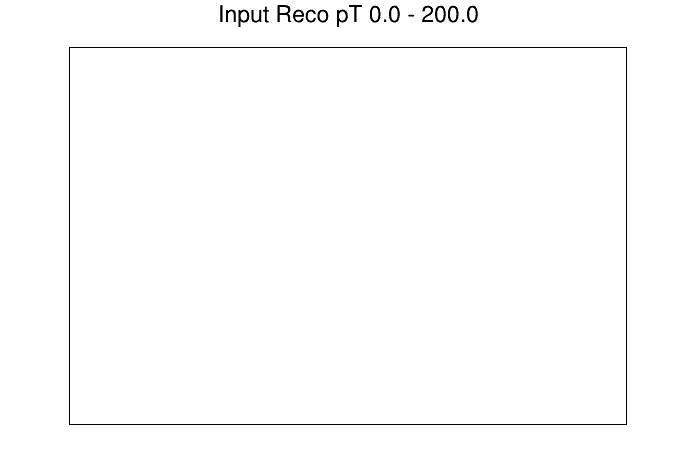

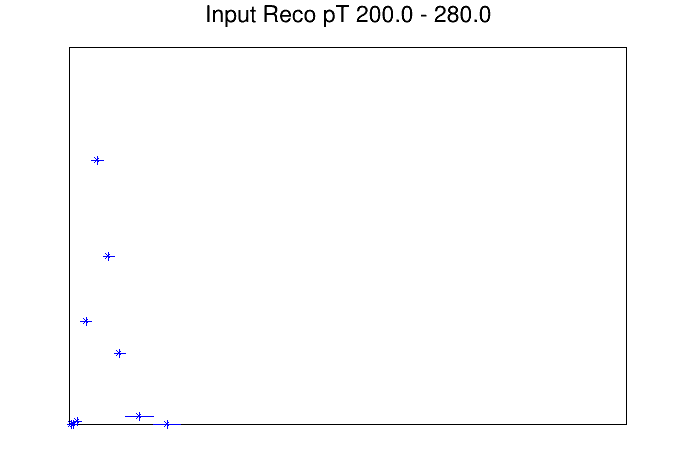

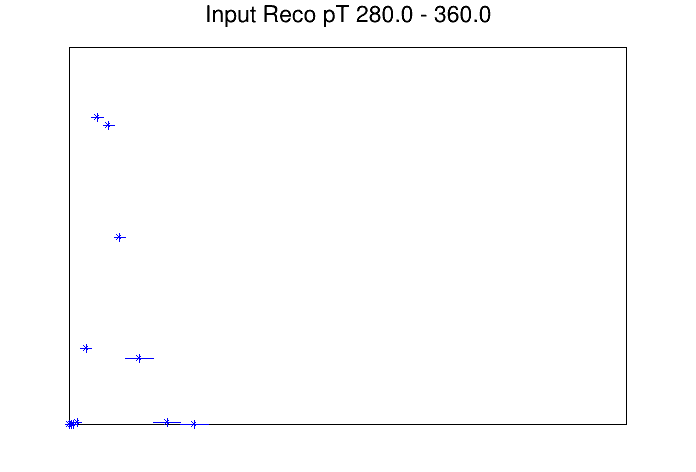

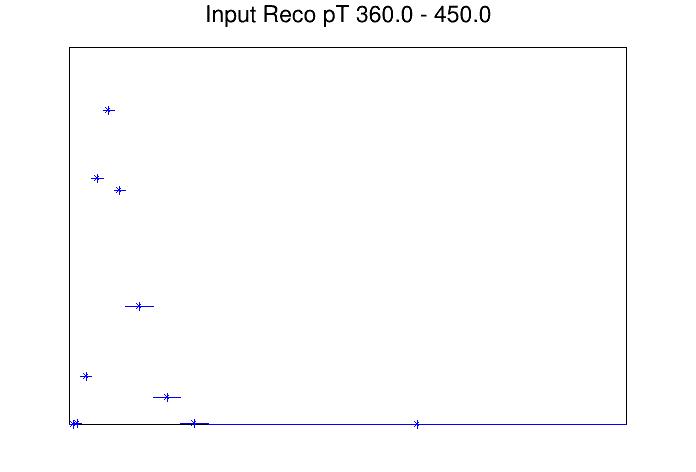

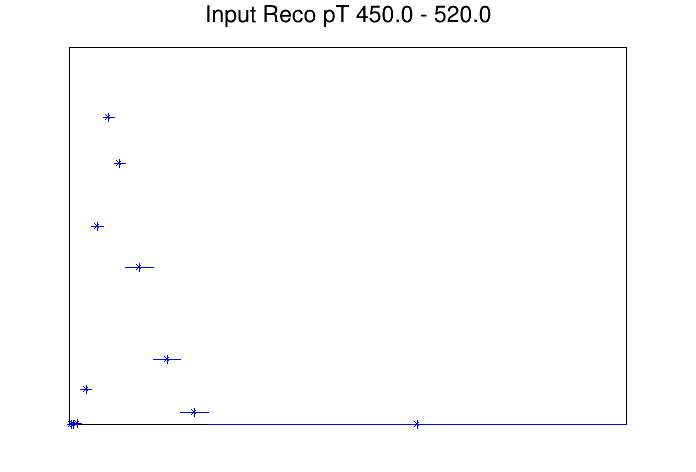

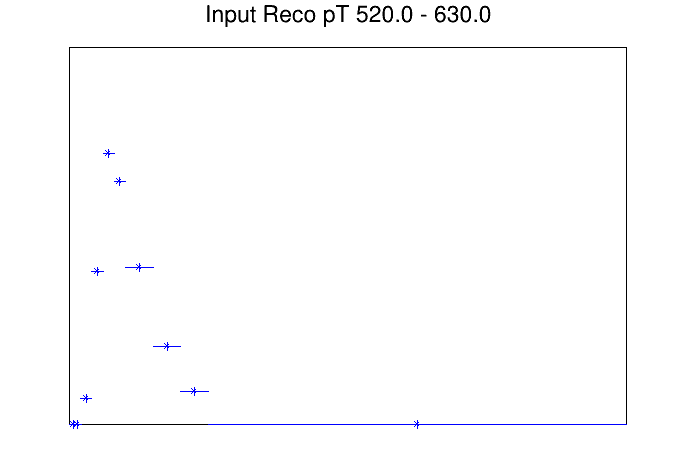

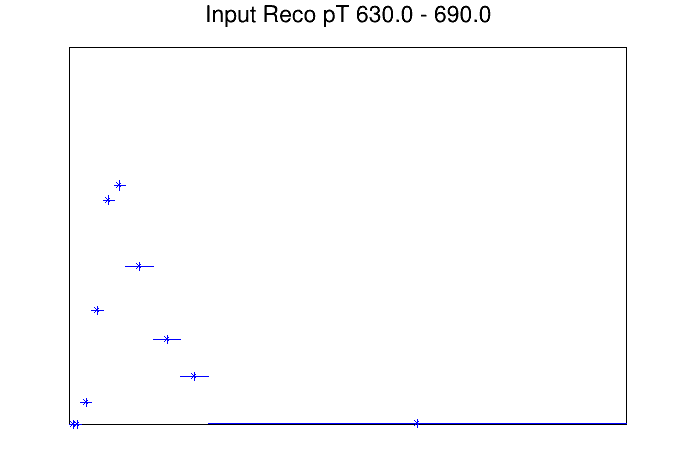

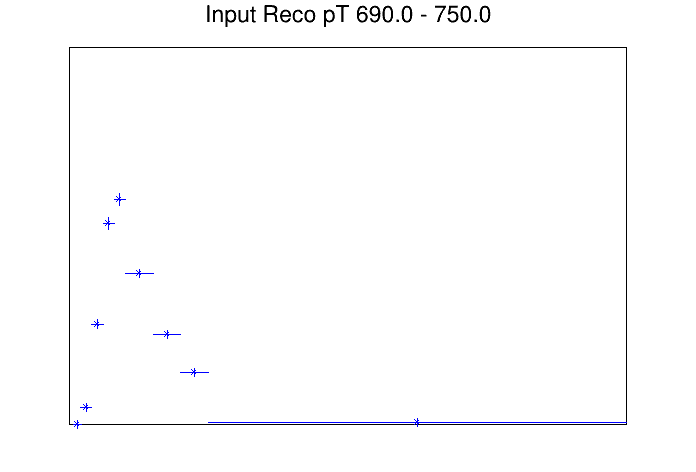

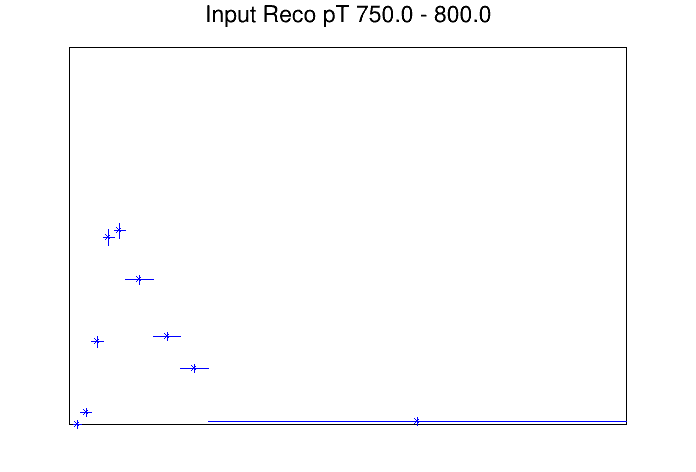

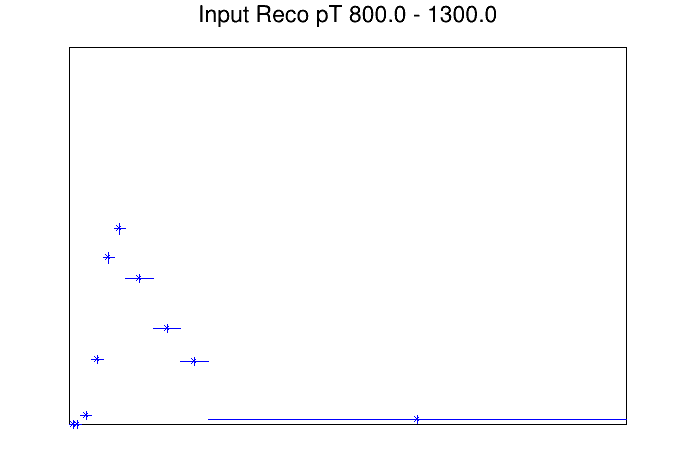

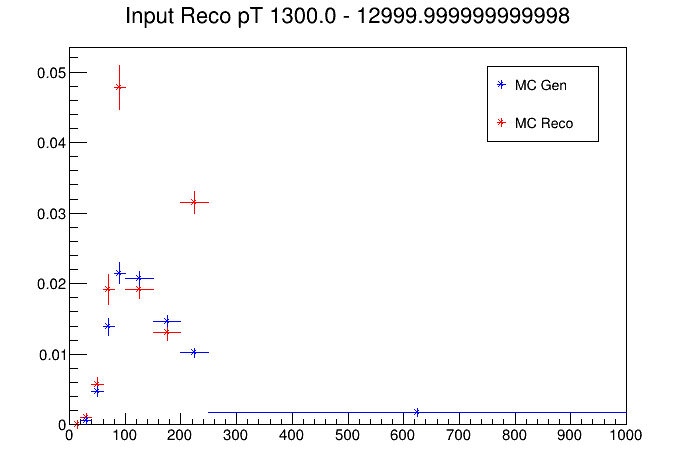

In [7]:
#### Plot reco binned in gen and gen on same plot --> use these hists to compare to unfolding
syst = "nominal"
print("Number of reco pt bins ", len(ptreco_edges)-1, " number of reco mass bins ", len(mreco_edges)-1)
print("Number of gen pt bins ", len(ptgen_edges)-1, " number of gen mass bins ", len(mgen_edges)-1)
recoBinnedi = []
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_reco = ROOT.TH1D("inputRecoPt" + str(ipt), "Input Reco pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
    #        hcopy.Print("all") 
    for im in range(len(mgen_edges)):
        im_r = im*2
        print("Gen mass bin ", mgen_edges[im], " reco mass bin ", mreco_edges[im_r])
        print("Gen mass bin ", im, " reco mass bin ", im_r)
        recoBinCont = hist['MCReco_u'].GetBinContent(im_r+1+ipt*(len(mreco_edges)-1)) + hist['MCReco_u'].GetBinContent(im_r+2+ipt*(len(mreco_edges)-1))
        recoBinErr = hist['MCReco_u'].GetBinError(im_r+1+ipt*(len(mreco_edges)-1)) + hist['MCReco_u'].GetBinError(im_r+2+ipt*(len(mreco_edges)-1))
        binwidth = hcopy.GetBinWidth(im)
        if binwidth>0:
            print("Bin width : ", binwidth)
            hcopy.SetBinContent(im, hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binwidth)
            hcopy.SetBinError(im, hist['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1))/binwidth)  
            hcopy_reco.SetBinContent(im, recoBinCont/binwidth)
            hcopy_reco.SetBinError(im, recoBinErr/binwidth) 
            print("Starting bin content ", hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)), " after norm ", hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binwidth)
            print("Starting bin content ", recoBinCont, " after norm ", recoBinCont/binwidth)
        else:  
            hcopy.SetBinContent(im, hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
            hcopy.SetBinError(im, hist['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1)))
            hcopy_reco.SetBinContent(im, recoBinCont)
            hcopy_reco.SetBinError(im, recoBinErr) 
        hcopy_reco.SetLineColor(ROOT.kRed)
        hcopy_reco.SetMarkerColor(ROOT.kRed)
        hcopy_reco.SetMarkerStyle(3)
        hcopy_reco.Draw("e")
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.SetMarkerStyle(3)
        hcopy.GetXaxis().SetTitle("MC Mass GeV")
        hcopy.Draw("same")    
        leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                 
        leg1.AddEntry(hcopy, "MC Gen", "p")
        leg1.AddEntry(hcopy_reco, "MC Reco", "p")
        leg1.Draw()
        ci.Draw()                                                                                                                                        
        ci.SaveAs(os_path+"MCGenRecoInput_ungroomed_"+syst+'_pt'+str(ptgen_edges[ipt])+"_"+year+".png")
        # ci.Close()
        #### add resp matrices and other hists to dictionary for final result                                                                             
        hists.append(hcopy)
        canvs.append(ci)


In [8]:
M = syst_hist_dict["nominal"]["MCGenRec_u"]
print(M.GetName())

histMCGenRec Ungroomed nominal


In [9]:
#### Better normalization

# could replace pt and m edges with coffea hist axis object
def NormM(M, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco", normMassWidth = False):
    ### missing is dividing by x-axis mass bin width --> currently being done in plotting only
    if yAxis == 'reco':
        x_ptedges = ptgen_edges
        x_medges = mgen_edges
        y_ptedges = ptreco_edges
        y_medges = mreco_edges
        xbinning = generatorBinning
        xnode = "gen"
        ybinning= detectorBinning
        ynode = "reco"
    else:
        x_ptedges = ptreco_edges
        x_medges = mreco_edges
        y_ptedges = ptgen_edges
        y_medges = mgen_edges
        ybinning = generatorBinning
        ynode = "gen"
        xbinning= detectorBinning
        xnode = "reco"
    #### Normalizing by sum of values along y axis for each x-pt bin
    #### In setup where reco is on y-axis, ptedges and m edges should belong to gen
    M_norm = M.Clone(M.GetName()+"Norm")
    #### remove fakes for debugging
    # for ix in range(M_norm.GetNbinsX()+1):
    #     for iy in range(M_norm.GetNbinsY()+1):
    #         M_norm.SetBinContent(ix,iy,0.0)
    for iptx in range(len(x_ptedges)-1):
        xbin0 = iptx*(len(x_medges)-1)+1
        xbin1 = (iptx+1)*(len(x_medges)-1)+1
        binsum = M.Integral(xbin0, xbin1, 0, M.GetNbinsY()+1)
        # for iy in range(0,M.GetNbinsY()+2):
        for imx in range(len(x_medges)-1):
            ix = iptx*(len(x_medges)-1)+imx+1
            medge0 = x_medges[imx]
            medge1 = x_medges[imx+1]
            binwidth  = medge1-medge0
            for iy in range(0, M_norm.GetNbinsY()+2):
                M_norm.SetBinContent( ix,iy, M.GetBinContent(ix, iy) )
                M_norm.SetBinError( ix,iy, M.GetBinError(ix, iy) )
                if binsum >0.:
                    M_norm.SetBinContent( ix,iy, M_norm.GetBinContent(ix, iy)/binsum )
                    M_norm.SetBinError( ix,iy, M_norm.GetBinError(ix, iy)/binsum )
                if binwidth >0. and normMassWidth:
                    M_norm.SetBinContent( ix,iy, M_norm.GetBinContent(ix, iy)/binwidth )
                    M_norm.SetBinError( ix,iy, M_norm.GetBinError(ix, iy)/binwidth )
    ### normalize by bin widths
    # for ix in range(1,M_norm.GetNbinsX()+1):
    #     binx = xbinning.FindNode(xnode).GetBinName(ix)
    #     print(binx)
    #     binsize_x = xbinning.FindNode(xnode).GetBinSize(ix) 
    #     for iy in range(1,M_norm.GetNbinsY()+1):
    #         biny = ybinning.FindNode(ynode).GetBinName(iy)
    #         print(biny)
    #         binsize_y = ybinning.FindNode(ynode).GetBinSize(iy) 
    #         area = binsize_x*binsize_y
    #         print("Binarea ", area)
    #         if area > 0.0 :
    #             M_norm.SetBinContent(ix,iy, M_norm.GetBinContent(ix,iy) / area )
    #             M_norm.SetBinError(ix,iy, M_norm.GetBinError(ix,iy) / area )
    return M_norm

def NormInput(input_dist, binning, ptedges, medges, normMassWidth=False) :
    input_norm = input_dist.Clone(input_dist.GetName())
    if "Truth" in input_dist.GetName():
        node = "gen"
    else:
        node = "reco"
    for ipt in range(len(ptedges)-1) :
        globbin0 = ipt*(len(medges)-1)+1
        globbin1 = (ipt+1)*(len(medges)-1)+1
        if node=="reco":
            globbin0 = globbin0+1
            globbin1 = globbin1+1
        binsum = input_dist.Integral(globbin0,globbin1)
        for im in range(len(medges)-1): #in current setup y axis is detector
            ix = globbin0+im
            medge0 = medges[im]
            medge1 = medges[im+1]
            binwidth  = medge1-medge0
            # print(binning.FindNode(node).GetBinName(ix))
            # binsize = binning.FindNode(node).GetBinSize(ix)
            bincontent = input_dist.GetBinContent(ix)
            binerror = input_dist.GetBinError( ix)
            # if binsize > 0. :
            #     bincontent = bincontent/binsize
            #     binerror = binerror/binsize   
            # input_norm.SetBinContent(ix, bincontent)    
            # input_norm.SetBinError(ix, binerror) 
            if binsum >0. :
                bincontent = bincontent/binsum
                binerror = binerror/binsum
            if binwidth > 0. and normMassWidth:
                bincontent = bincontent/binwidth
                binerror = binerror/binwidth
            input_norm.SetBinContent(ix, bincontent)
            input_norm.SetBinError(ix, binerror) 
    return input_norm

In [10]:
#### Normalize response matrix and draw it and original
M_norm = NormM(M, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco")
def norm_hist_dict(syst_hist_dict, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco"):
    syst_dict_norm = {}
    for syst, hist_dict in syst_hist_dict.items():
        print(syst)
        norm_dict = {}
        for hist_name, hist in hist_dict.items():
            if "GenRec" in hist_name:
                hist_norm = NormM(hist, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco")
                norm_dict[hist_name] = hist_norm
            elif "Truth" in hist_name:
                hist_norm = NormInput(hist, generatorBinning, ptgen_edges, mgen_edges )
                norm_dict[hist_name] = hist_norm
            elif "Reco" in hist_name:
                hist_norm = NormInput(hist, detectorBinning, ptreco_edges, mreco_edges )
                norm_dict[hist_name] = hist_norm
        syst_dict_norm[syst]=norm_dict
    return syst_dict_norm
normed_hist_dict = norm_hist_dict(syst_hist_dict, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges, detectorBinning, generatorBinning, yAxis = "reco")

PUSFUp
PUSFDown
L1prefiringDown
L1prefiringUp
nominal
jerUp
jerDown
AbsoluteMPFBiasUp
AbsoluteMPFBiasDown
AbsoluteScaleUp
AbsoluteScaleDown
AbsoluteStatUp
AbsoluteStatDown
FlavorQCDUp
FlavorQCDDown
FragmentationUp
FragmentationDown
PileUpDataMCUp
PileUpDataMCDown
PileUpPtBBUp
PileUpPtBBDown
PileUpPtEC1Up
PileUpPtEC1Down
PileUpPtEC2Up
PileUpPtEC2Down
PileUpPtHFUp
PileUpPtHFDown
PileUpPtRefUp
PileUpPtRefDown
RelativeFSRUp
RelativeFSRDown
RelativeJEREC1Up
RelativeJEREC1Down
RelativeJEREC2Up
RelativeJEREC2Down
RelativeJERHFUp
RelativeJERHFDown
RelativePtBBUp
RelativePtBBDown
RelativePtEC1Up
RelativePtEC1Down
RelativePtEC2Up
RelativePtEC2Down
RelativePtHFUp
RelativePtHFDown
RelativeBalUp
RelativeBalDown
RelativeSampleUp
RelativeSampleDown
RelativeStatECUp
RelativeStatECDown
RelativeStatFSRUp
RelativeStatFSRDown
RelativeStatHFUp
RelativeStatHFDown
SinglePionECALUp
SinglePionECALDown
SinglePionHCALUp
SinglePionHCALDown
TimePtEtaUp
TimePtEtaDown


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


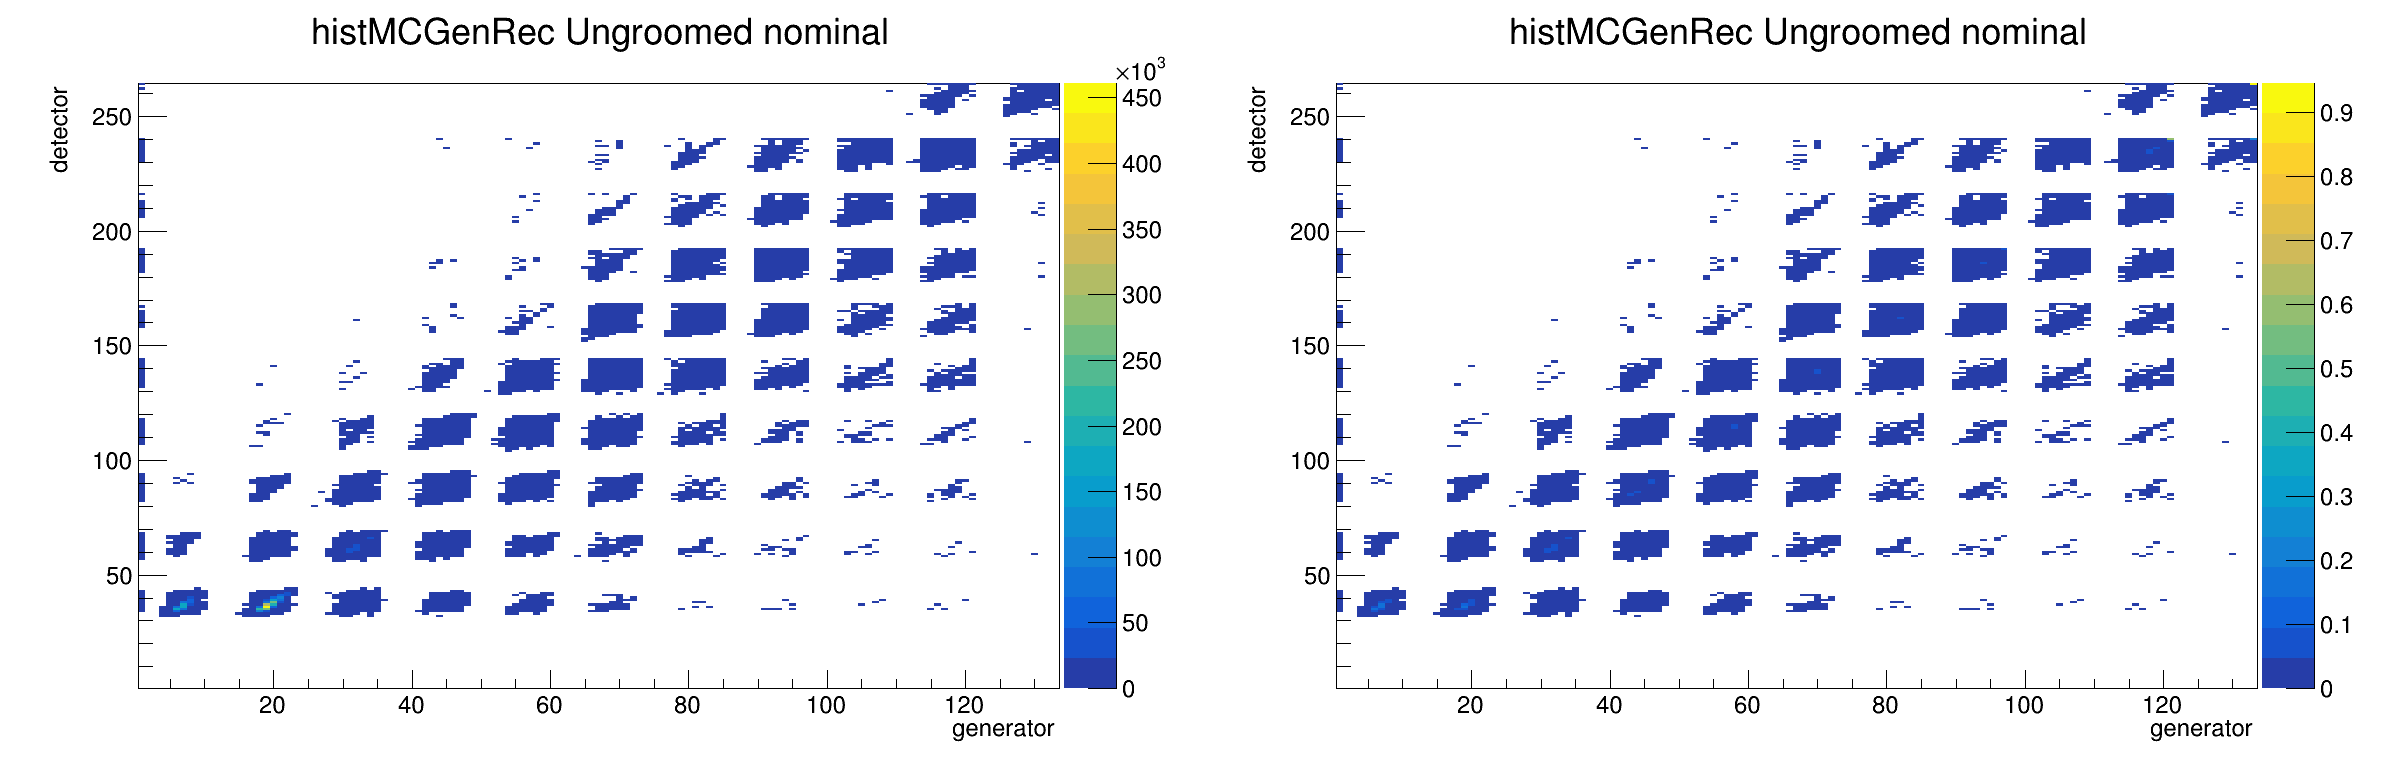

In [11]:
c0 = ROOT.TCanvas("c0", "c0",2400, 800)
c0.Divide(2,1)
c0.cd(1)
M.Draw("colz")
c0.cd(2)
M_norm.Draw("colz")
c0.Draw()
#### NOTE: Need to figure out and add fakes --> only divide by reco bin width and same event value?
#### May be correct to remove fakes and scale down rest of eventd like in https://github.com/FNALLPC/unfolding-hats/blob/fd0003718d7435dee170a0b0a7cbe702e681bb7a/tunfold/unfold_data.ipynb#L171

{'MCGenRec_u': <cppyy.gbl.TH2D object at 0x7fe1114fae00>, 'MCGenRec_g': <cppyy.gbl.TH2D object at 0x7fe1228b8600>, 'MCReco_u': <cppyy.gbl.TH1D object at 0x7fe111d5e050>, 'MCTruth_u': <cppyy.gbl.TH1D object at 0x7fe111f618c0>, 'MCReco_g': <cppyy.gbl.TH1D object at 0x7fe1140518b0>, 'MCTruth_g': <cppyy.gbl.TH1D object at 0x7fe114051ca0>}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


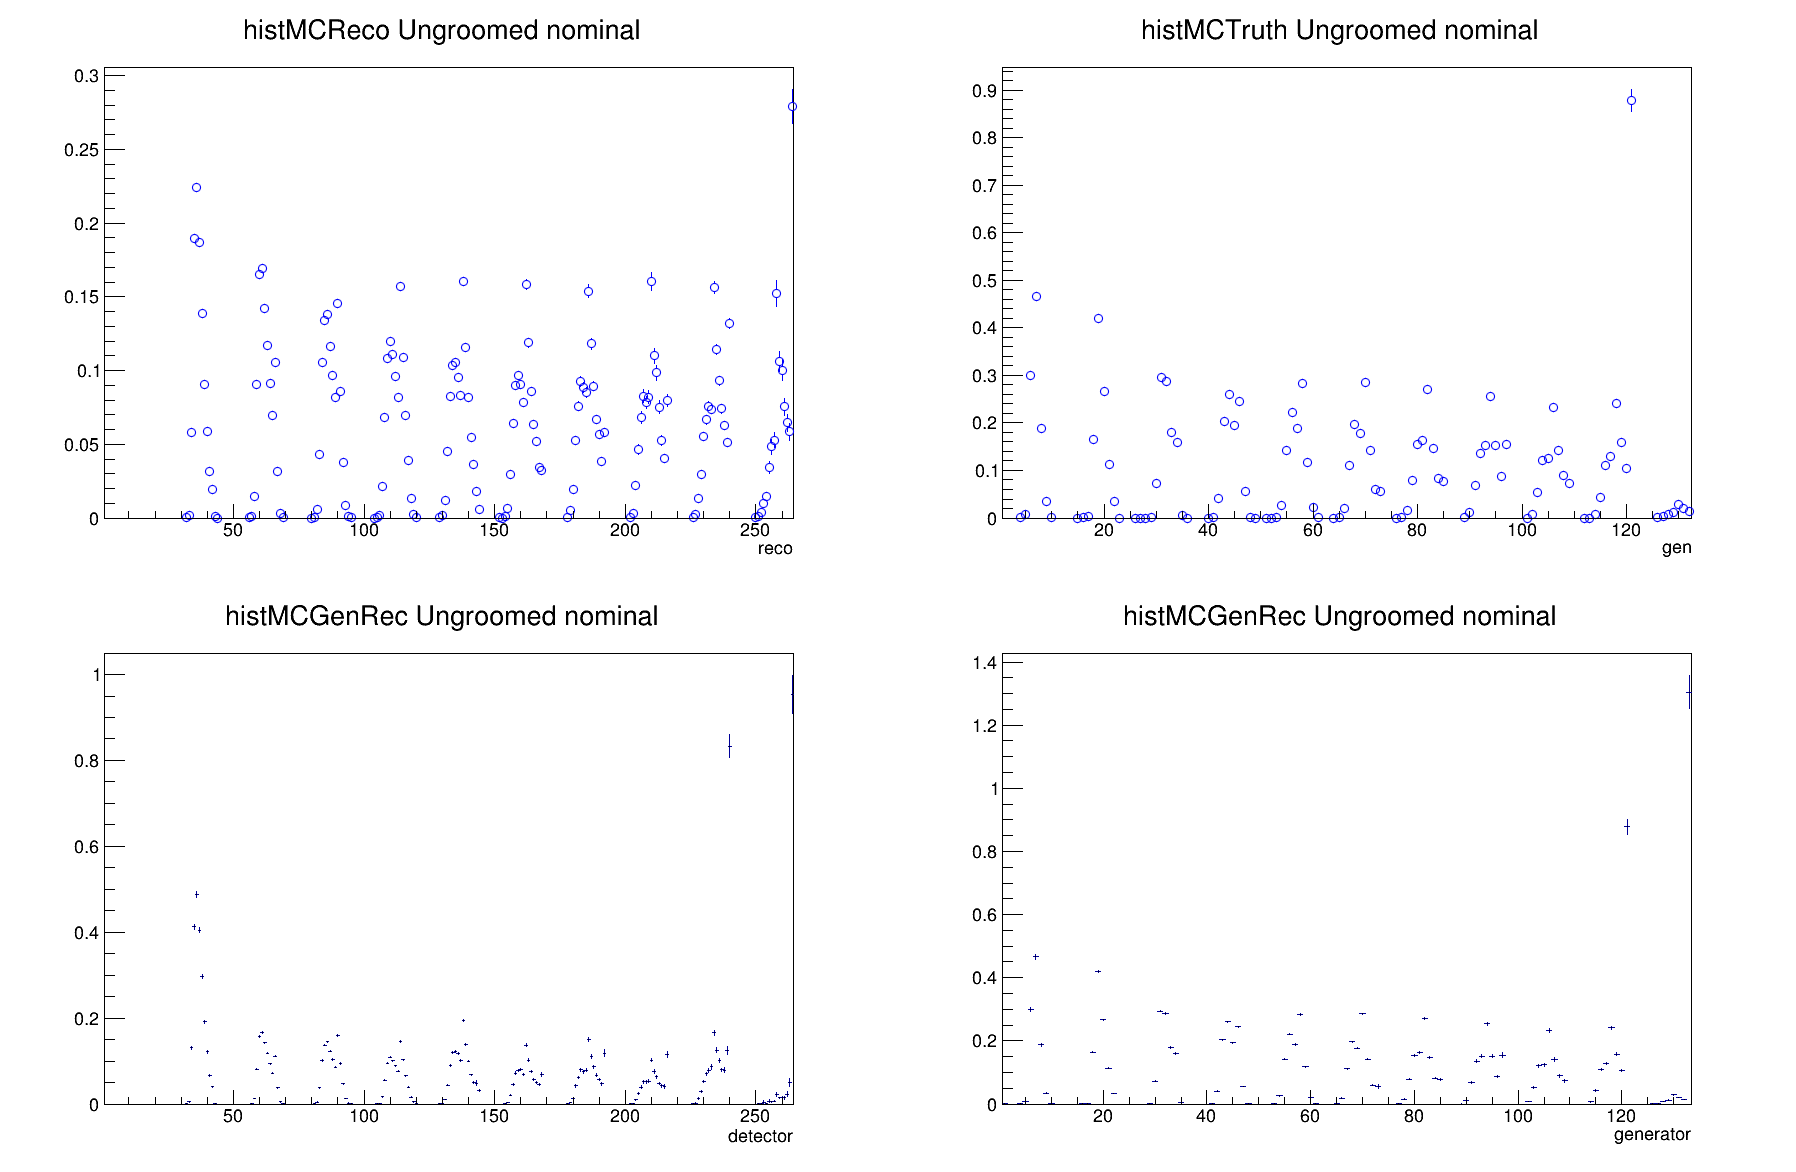

In [12]:
print(normed_hist_dict["nominal"])
M_norm = normed_hist_dict["nominal"]["MCGenRec_u"]
htrue_norm = normed_hist_dict["nominal"]["MCTruth_u"]
h_norm= normed_hist_dict["nominal"]["MCReco_u"]
h_norm_M=M_norm.ProjectionY("MCReco_u_norm")
htrue_norm_M=M_norm.ProjectionX("MCTruth_u_norm")
# h_norm_M_other=M_norm_other.ProjectionY("MCReco_u_normO")
# htrue_norm_M_other=M_norm_other.ProjectionX("MCTruth_u_normO")
c0 = ROOT.TCanvas("c0", "c0", 1800, 1200)
c0.Divide(2,2)
c0.cd(1)
h_norm.Draw("e")
c0.cd(2)
htrue_norm.Draw("e")
c0.cd(3)
h_norm_M.Draw("e")
c0.cd(4)
htrue_norm_M.Draw("e")
c0.cd(5)
# htrue_norm_other.Draw("e")
# c0.cd(6)
# htrue_norm_M_other.Draw("e")
c0.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


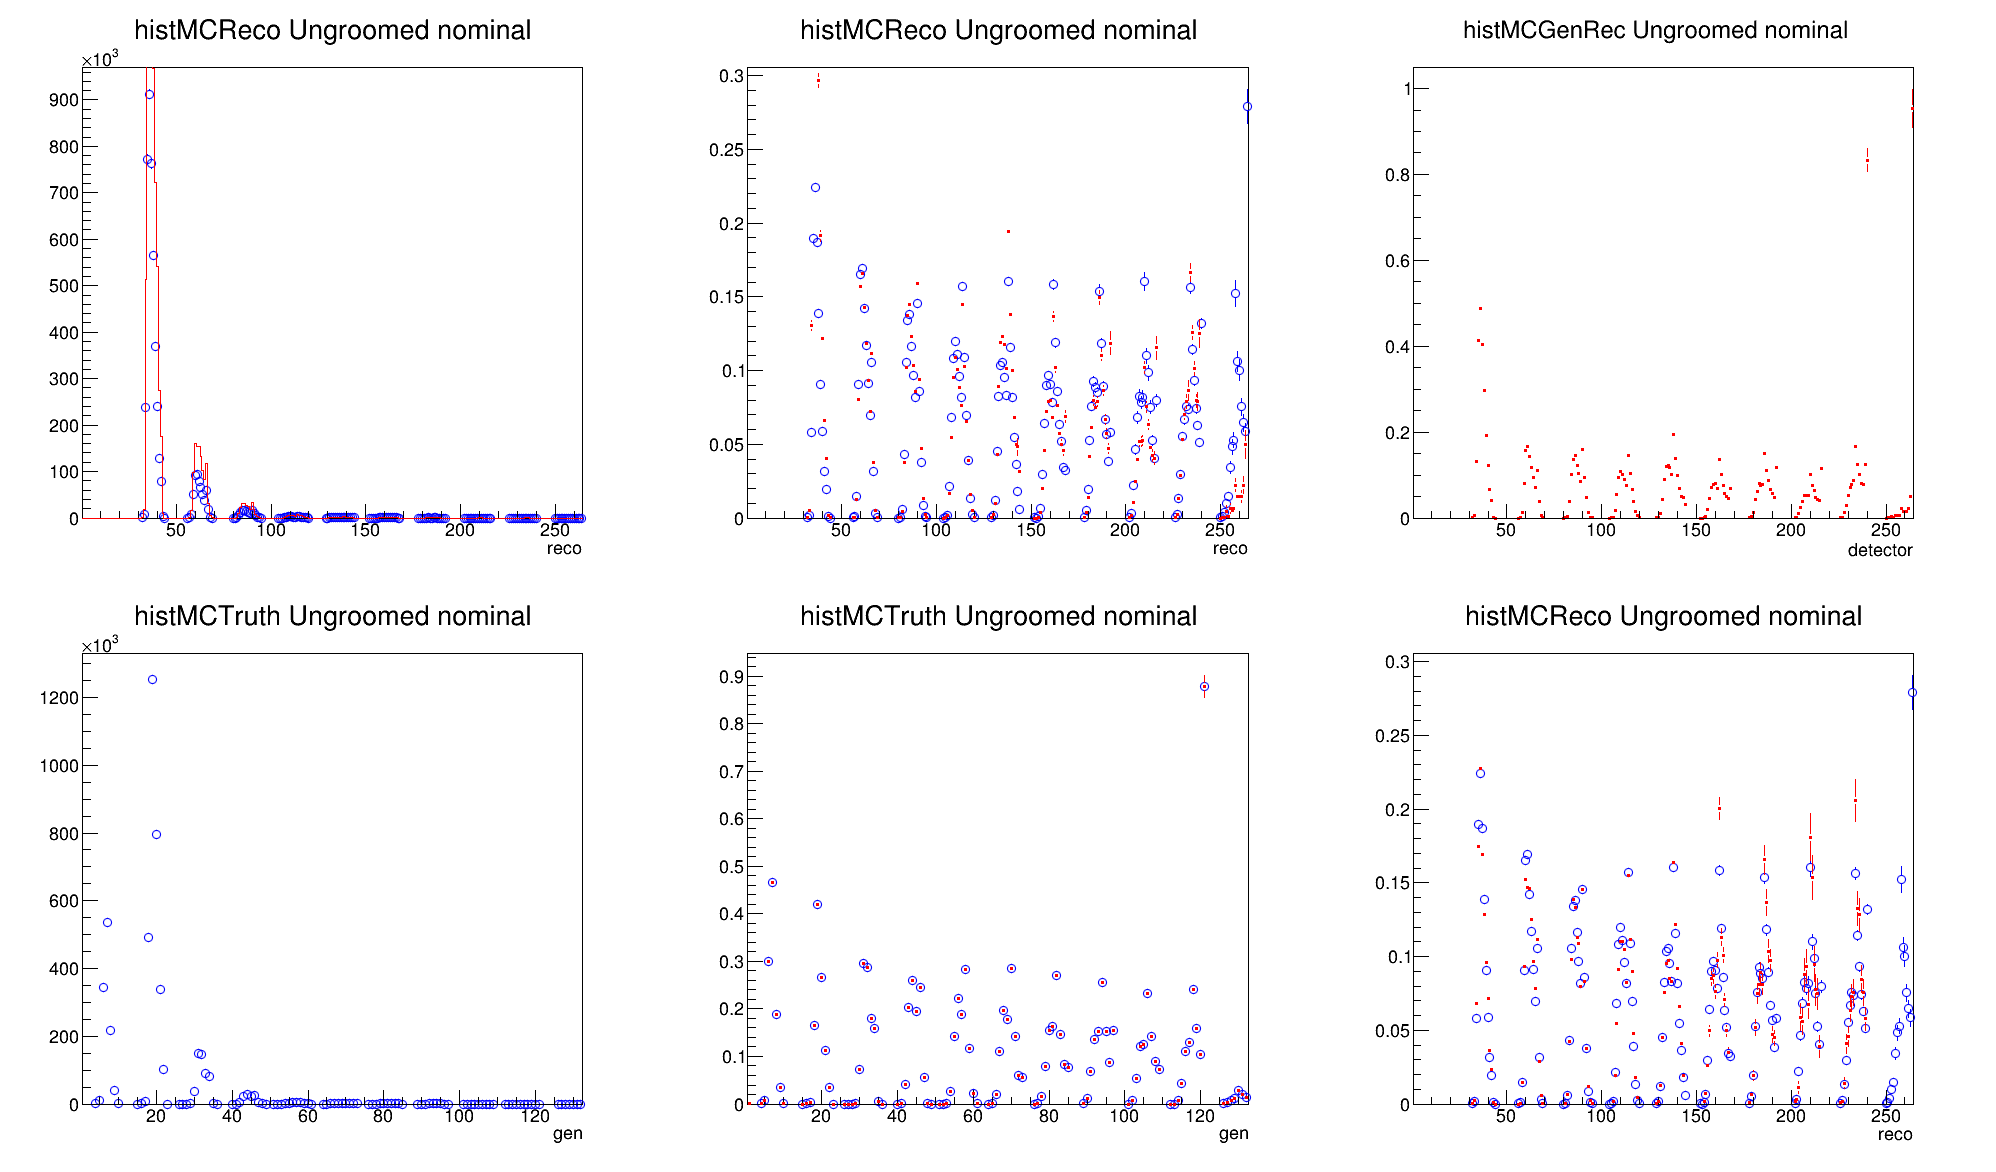

In [13]:
h=hist["MCReco_u"]
hdata = DataReco_u
hdata_norm= NormInput(hdata, detectorBinning, ptreco_edges, mreco_edges )
htrue = hist["MCTruth_u"]
c0 = ROOT.TCanvas("c0", "c0", 2000, 1200)
c0.Divide(3,2)
c0.cd(1)
h.Draw("e")
hdata.SetLineColor(ROOT.kRed)
hdata.SetMarkerColor(ROOT.kRed)
hdata.SetMarkerStyle(7)
hdata.Draw("same")
c0.cd(2)
h_norm.SetLineColor(ROOT.kBlue)
h_norm.SetMarkerColor(ROOT.kBlue)
h_norm.SetMarkerStyle(24)
h_norm.Draw("e")
h_norm_M.SetLineColor(ROOT.kRed)
h_norm_M.SetMarkerColor(ROOT.kRed)
h_norm_M.SetMarkerStyle(7)
h_norm_M.Draw("same")
c0.cd(3)
h_norm_M.Draw("e")
c0.cd(4)
htrue.Draw("e")
c0.cd(5)
htrue_norm.SetLineColor(ROOT.kBlue)
htrue_norm.SetMarkerColor(ROOT.kBlue)
htrue_norm.SetMarkerStyle(24)
htrue_norm.Draw("e")
htrue_norm_M.SetLineColor(ROOT.kRed)
htrue_norm_M.SetMarkerColor(ROOT.kRed)
htrue_norm_M.SetMarkerStyle(7)
htrue_norm_M.Draw("same")
c0.cd(6)
h_norm.SetLineColor(ROOT.kBlue)
h_norm.SetMarkerColor(ROOT.kBlue)
h_norm.SetMarkerStyle(24)
h_norm.Draw("e")
hdata_norm.SetLineColor(ROOT.kRed)
hdata_norm.SetMarkerColor(ROOT.kRed)
hdata_norm.SetMarkerStyle(7)
hdata_norm.Draw("same")
c0.Draw()

In [14]:
plotMatrixInputs(ptgen_edges, mgen_edges, normed_hist_dict["nominal"], "MCTruth_u", os_path = os_path+"Norm", norm_by_bw=True)
#### should be divided by bin width already -- figure out why failing

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0
Info in <TCanvas::Print>: png file plots/unfolding/trijet/NormInputMCTruth_u_nominal_pt0.0_2018.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file plots/unfolding/trijet/NormInputMCTruth_u_nominal_pt200.0_2018.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file plots/unfolding/trijet/NormInputMCTruth_u_nominal_pt280.0_2018.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::Print>: png file plots/unfolding/trijet/NormInputMCTruth_u_nominal_pt360.0_2018.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file plots/unfolding/trijet/NormInputMCTruth_u_nominal_pt450.0_2018.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with s

In [15]:
plotinputsROOT(M_norm, htrue_norm, h_norm, groom="ungroomed", syst="nominal", year=year, ospath=os_path+"normed")

Info in <TCanvas::Print>: png file plots/unfolding/trijet/normedMCInput_ungroomed_nominalflatmatrix2018.png has been created


In [16]:
#### do unfolding
#### M is response matrix, h is recotruth, hdata is data to be unfolded
def doUnfold(hdata, syst_hist_dict, availSysts, closure = False, Reg = False, groomed = True,os_path=None):
    if groomed:
        respStr = "MCGenRec_g"
        M = syst_hist_dict["nominal"]["MCGenRec_g"]
        h = syst_hist_dict["nominal"]["MCReco_g"]
        os_path=os_path+"Groomed"
    else:
        respStr = "MCGenRec_u"
        M = syst_hist_dict["nominal"]["MCGenRec_u"]
        h = syst_hist_dict["nominal"]["MCReco_u"]
        os_path=os_path+"Ungroomed"
    orientation = ROOT.TUnfold.kHistMapOutputHoriz
    regMode = ROOT.TUnfold.kRegModeCurvature
    con = ROOT.TUnfold.kEConstraintArea
    mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
    axisSteering =  "*[b]"
    #u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)

    u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
    # u_test = ROOT.TUnfoldDensity(syst_hist_dict["jerUp"]["MCGenRec_u"],orientation,regMode,con)
    if closure:
        u.SetInput(h)
        os_path=os_path+"Closure"
        # u_test.SetInput(h)
    else:
        u.SetInput(hdata)
        # u_test.SetInput(hdata)
    for syst in [syst for syst in availSysts if syst!="nominal"]:
        u.AddSysError(syst_hist_dict[syst][respStr], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
    nScan=50
    tauMin=0.0
    tauMax=0.0
    # nScan = 100
    # tauMin= 1e-6
    # tauMax= 1e-2
    iBest=0

    logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
    logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
    lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
    if not Reg:
        u.DoUnfold(0.0)
        os_path = os_path+"NoReg"
    else:
        iBest=u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
    o = u.GetOutput("o")
    return u, o, os_path, lCurve, iBest

In [17]:
#### NEED TO EDIT AND IMPLEMENT FOLLOWING CODE BLOCK TO ACCOUNT FOR FAKES 
# # Scale down 'ttbar' part of measurement to account for fake fraction, as given by response matrix
# for ii in xrange(1,response.GetNbinsX()+1):
#     if response.Integral(ii,ii,0,response.GetNbinsY()+1) > 0.0 :
#         fakefraction = response.GetBinContent(ii,0) / response.Integral(ii,ii,0,response.GetNbinsY()+1)
#         measurement.SetBinContent(ii,measurement.GetBinContent(ii)*(1.0-fakefraction))
#         measurement.SetBinError(ii,measurement.GetBinError(ii)*(1.0-fakefraction))
#         response.SetBinContent(ii,0,0)
#         response.SetBinError(ii,0,0)

Info in <TCanvas::Print>: png file plots/unfolding/trijet/RespMatrix_ungroomed_nominal2018.png has been created


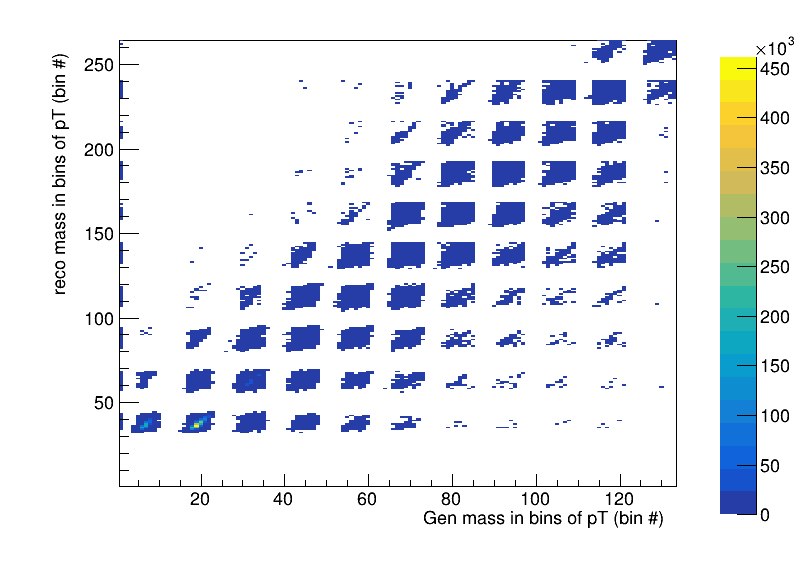

In [18]:
# -------------------------------------------------------------------------------------
# Draw response matrix
# -------------------------------------------------------------------------------------

c1 = ROOT.TCanvas("c1", "", 800, 600)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 

M.SetTitle(";Gen mass in bins of pT (bin #);reco mass in bins of pT (bin #)")
M.GetZaxis()
M.Draw("colz")

c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")


In [19]:
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/"
else:
    os_path = "plots/unfolding/trijet/"
##### Do unfolding absolute, Ungroomed
u,o,os_path, lCurve, iBest = doUnfold(hdata = DataReco_u,syst_hist_dict=syst_hist_dict, availSysts=availSysts, closure = False, Reg = True, 
                       groomed = False, os_path=os_path)
htrue = syst_hist_dict["nominal"]["MCTruth_u"]

##### Do unfolding absolute, Groomed
# u,o,os_path = doUnfold(hdata = DataReco_g,syst_hist_dict=syst_hist_dict, availSysts=availSysts, closure = False, Reg = True, 
#                        groomed = True, os_path=os_path)
# htrue = syst_hist_dict["nominal"]["MCTruth_g"]

##### Do unfolding normalized, ungroomed
# u,o,os_path = doUnfold(hdata = hdata_norm,syst_hist_dict=normed_hist_dict, availSysts=availSysts, closure = True, Reg = False, 
#                        groomed = True, os_path=os_path)
# htrue = normed_hist_dict["nominal"]["MCTruth_g"]
# os_path=os_path+"Norm"

##### Do unfolding normalized, ungroomed
# u,o,os_path, lCurve, iBest = doUnfold(hdata = hdata_norm,syst_hist_dict=normed_hist_dict, availSysts=availSysts, closure = True, Reg = True, 
#                         groomed = False, os_path=os_path)
# htrue = normed_hist_dict["nominal"]["MCTruth_u"]
# os_path=os_path+"Norm"

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 30 output bins do not depend on the input data  0 2-3 11-14 24-25 37-39 50 62-63 74-75 86-88 98-100 110-111 122-125 134
Info in <TUnfold::TUnfold>: 264 input bins and 105 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:Gen mass in bins of pT (bin #)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #2 (xaxis:Gen mass in bins of pT (bin #)[1.5,2.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #3 (xaxis:Gen mass in bins of pT (bin #)[2.5,3.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:Gen mass in bins of pT (bin #)[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #12 (xaxis:Gen mass in bins of pT (bin #)[11.5,12.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #13 (xaxis:Gen mass in bins of pT (bin #)[12.5,13.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #14 (xaxis:Gen mass in bins of pT (bin #)[

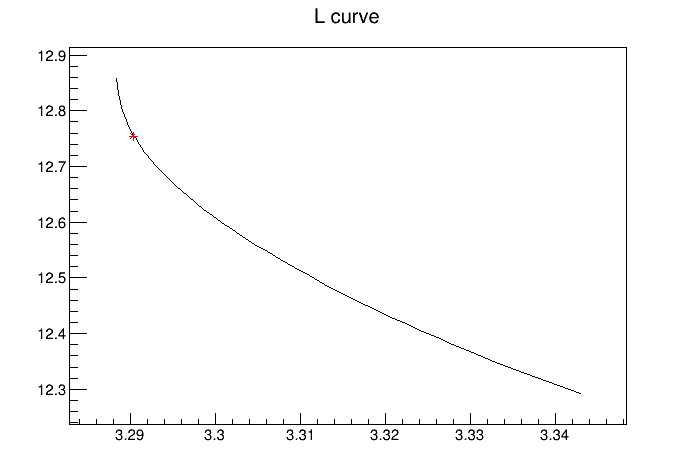

In [20]:
#### Plot Lcurve
cL = ROOT.TCanvas()

x = array.array('d',[0] )
y = array.array('d',[0] )
lCurve.Draw('alp same')

lCurve.GetPoint(iBest, x, y)

bestLCurve=ROOT.TGraph(1,x,y)
bestLCurve.SetMarkerStyle(3)
bestLCurve.SetMarkerColor(ROOT.kRed)
bestLCurve.Draw('same *')
cL.Draw()

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfoldingOutput_allbins2018.png has been created


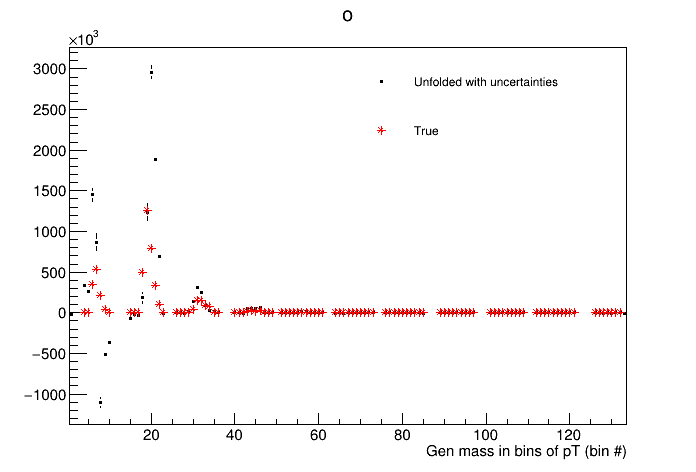

In [21]:
%jsroot off
o.SetMarkerStyle(7)
o.SetLineColor(ROOT.kBlack)

htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_allbins"+year+".png")

In [22]:
# #### Get systematic uncertainties
# syst_uncorr = [
#     'jerUp',
#     'jerDown'
#     'PUSFUp',
#     'PUSFDown', #L1 + PDFs?
#     'AbsoluteStatUp',
#     'AbsoluteStatDown',
#     'FlavorQCDUp',
#     'FlavorQCDDown',
#     'FragmentationUp',
#     'FragmentationDown',
#     'PileUpDataMCUp',
#     'PileUpDataMCDown',
#     'RelativeBalUp',
#     'RelativeBalDown',
#     'RelativeJEREC1Up',
#     'RelativeJEREC1Down',
#     'RelativeJEREC2Up',
#     'RelativeJEREC2Down',
#     'RelativePtEC1Up',
#     'RelativePtEC1Down',
#     'RelativePtEC2Up',
#     'RelativePtEC2Down',
#     'RelativeSampleUp',
#     'RelativeSampleDown',
#     'RelativeStatECUp',
#     'RelativeStatECDown',
#     'RelativeStatFSRUp',
#     'RelativeStatFSRDown',
#     'RelativeStatHFUp',
#     'RelativeStatHFDown',
# ]

# absolute = ['AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown','AbsoluteScaleUp', 'AbsoluteScaleDown']
# pileuppt = ['PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down',
# 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown']
# relpt = ['RelativePtEC1Up', 'RelativePtEC1Down','RelativePtHFUp', 'RelativePtHFDown']
# singlepion =     ['SinglePionECALUp', 'SinglePionECALDown','SinglePionHCALUp', 'SinglePionHCALDown']
# timepteta = ['TimePtEtaUp', 'TimePtEtaDown']

# # no_influence = ["FragmentationUp", "PileUpPtEC2Up", "PileUpPtEC2Down", "PileUpPtHFUp", "PileUpPtHFDown", "RelativeJEREC2Down", "RelativeJERHFUp", 
# # "RelativeJERHFDown","RelativePtBBUp", "RelativePtBBDown", "RelativePtEC1Down", "RelativePtEC2Up", "RelativePtEC2Down", "RelativePtHFUp",
# # "RelativePtHFDown", "RelativeStatHFUp", "RelativeStatHFDown"]
# no_influence=[]
# availSysts = [syst for syst in availSysts if availSysts not in no_influence]
# syst_list = [syst for syst in availSysts if syst!="nominal" and syst not in syst_uncorr]
# syst_uncorr = [syst for syst in syst_uncorr if syst in availSysts]

# syst_uncorr_Up = [syst for syst in syst_uncorr if syst[-2:]=="Up"]
# absolute_Up = [syst for syst in absolute if syst[-2:]=="Up" and syst in availSysts]
# pileuppt_Up = [syst for syst in pileuppt if syst[-2:]=="Up" and syst in availSysts]
# relpt_Up = [syst for syst in relpt if syst[-2:]=="Up" and syst in availSysts]
# singlepion_Up = [syst for syst in singlepion if syst[-2:]=="Up" and syst in availSysts]
# timepteta_Up = [syst for syst in timepteta if syst[-2:]=="Up" and syst in availSysts]

# ####
# systErr = {}  
# oSys = o.Clone("Systematic")
# #### For all systs get differences between syst and nominal hist and add to dictionary
# for syst in availSysts:
#     print("Adding syst to dict", syst)
#     systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
# src_list = [absolute_Up, pileuppt_Up, relpt_Up, singlepion_Up, timepteta_Up]
# src_list_names = ['absolute_Up', 'pileuppt_Up', 'relpt_Up', 'singlepion_Up', 'timepteta_Up']
# src_dict = {}
# for i_name, src in enumerate(src_list):
#     hdiff = np.zeros(o.GetNbinsX())
#     for syst in src: 
#         deltasys = np.zeros(o.GetNbinsX())
#         for i in range(1,o.GetNbinsX()+1 ):
#             deltasys[i-1] = systErr[syst].GetBinContent(i)
#         hdiff +=  deltasys
#     src_dict.update({src_list_names[i_name]:hdiff})

# total_sources2 =    np.zeros(o.GetNbinsX())     

# for key in src_dict.keys():
#     total_sources2 = total_sources2 + src_dict[key]**2

# all_src_dict = {'total_sources2': total_sources2}

# for sys in syst_uncorr_Up:
#     hdiff2 = np.zeros(o.GetNbinsX())
#     for sys in src:
#         deltasys = np.zeros(o.GetNbinsX())
#         for i in range(1,o.GetNbinsX()+1 ):
#             deltasys[i-1] = systErr[sys].GetBinContent(i)
#         hdiff2 += deltasys**2
#     all_src_dict.update({sys: hdiff2})

# total_unc2 = np.zeros(o.GetNbinsX()) 
# for key in all_src_dict.keys():
#     total_unc2 += all_src_dict[key]

# total_unc = total_unc2**0.5 ##total systematic unc

# for i in range(1, o.GetNbinsX()+1):
#     oSys.SetBinError(i, total_unc[i-1])

In [23]:
no_influence=[]
def getTotSyst(o,u, availSysts, no_influence=None):
    oSys = ROOT.TGraphAsymmErrors(o.Clone("Systematic"))
    oSys.Print("range")
    syst_uncorr = [
    'jerUp','jerDown'
    'PUSFUp','PUSFDown', #PDFs WIP
    'L1prefiringDown', 'L1prefiringUp', 
    'AbsoluteStatUp','AbsoluteStatDown',
    'FlavorQCDUp','FlavorQCDDown',
    'FragmentationUp','FragmentationDown',
    'PileUpDataMCUp','PileUpDataMCDown',
    'RelativeBalUp','RelativeBalDown',
    'RelativeJEREC1Up','RelativeJEREC1Down',
    'RelativeJEREC2Up','RelativeJEREC2Down',
    'RelativePtEC1Up','RelativePtEC1Down',
    'RelativePtEC2Up','RelativePtEC2Down',
    'RelativeSampleUp','RelativeSampleDown',
    'RelativeStatECUp','RelativeStatECDown',
    'RelativeStatFSRUp','RelativeStatFSRDown',
    'RelativeStatHFUp','RelativeStatHFDown',
]

    absolute = ['AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown',
                'AbsoluteScaleUp', 'AbsoluteScaleDown']
    pileuppt = ['PileUpPtBBUp', 'PileUpPtBBDown', 
                'PileUpPtEC1Up', 'PileUpPtEC1Down',
                'PileUpPtEC2Up', 'PileUpPtEC2Down', 
                'PileUpPtHFUp', 'PileUpPtHFDown', 
                'PileUpPtRefUp', 'PileUpPtRefDown']
    relpt = ['RelativePtEC1Up', 'RelativePtEC1Down','RelativePtHFUp', 'RelativePtHFDown']
    singlepion =     ['SinglePionECALUp', 'SinglePionECALDown','SinglePionHCALUp', 'SinglePionHCALDown']
    timepteta = ['TimePtEtaUp', 'TimePtEtaDown']

    availSysts = [syst for syst in availSysts if syst!="nominal"]
    syst_uncorr = [syst for syst in syst_uncorr if syst in availSysts]
    corr_grps = [absolute, pileuppt, relpt, singlepion, timepteta]
    systErr = {}  
    #### For all systs get differences between syst and nominal hist and add to dictionary
    for syst in availSysts:
        # print("Adding syst to dict", syst)
        systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
        print(systErr[syst])
        print([systErr[syst].GetBinContent(i) for i in range(systErr[syst].GetNbinsX())])
        # systErr[syst].Print("range")
    # sysErrTot_up = o.Clone("Systematic")
    # sysErrTot_up.Reset()
    # sysErrTot_up.SetName("TotSystUp")
    # sysErrTot_down = o.Clone("Systematic")
    # sysErrTot_down.Reset()
    # sysErrTot_down.SetName("TotSystDown")
    sysErrTot_up = np.zeros(o.GetNbinsX())
    sysErrTot_down = np.zeros(o.GetNbinsX())
    #### Loop through uncorrelated groups and add them linearly
    for grp in corr_grps:
        # grp_unc_total_up = o.Clone("Systematic")
        # grp_unc_total_up.Reset()
        # grp_unc_total_up.SetName("CorrSystDown")
        # grp_unc_total_down  = o.Clone("Systematic")
        # grp_unc_total_down.Reset()
        # grp_unc_total_down.SetName("CorrSystDown")
        grp_unc_total_up = np.zeros(o.GetNbinsX())
        grp_unc_total_down = np.zeros(o.GetNbinsX())
        for syst in grp:
            print(syst, " added")
            if "Up" in syst and syst in availSysts:
                for i in range(1, o.GetNbinsX()+1):
                    grp_unc_total_up[i-1]+= abs(systErr[syst].GetBinContent(i))
                #     grp_unc_total_up.SetBinContent(i, grp_unc_total_up.GetBinContent(i) + abs(systErr[syst].GetBinContent(i)))
            if "Down" in syst and syst in availSysts:
                for i in range(1, o.GetNbinsX()+1):
                    grp_unc_total_down[i-1]+= abs(systErr[syst].GetBinContent(i))
                #     grp_unc_total_down.SetBinContent(i, grp_unc_total_down.GetBinContent(i) + abs(systErr[syst].GetBinContent(i)))
        # print("Total unc up ", grp_unc_total_up," and down ", grp_unc_total_down, "for group ", grp)
        sysErrTot_up +=grp_unc_total_up**2
        sysErrTot_down +=grp_unc_total_down**2
        # sysErrTot_up.SetBinContent(i, sysErrTot_up.GetBinContent(i) + grp_unc_total_up.GetBinError(i)**2)
        # sysErrTot_down.SetBinContent(i, sysErrTot_down.GetBinContent(i) + grp_unc_total_down.GetBinError(i)**2)
    # print("Total corr unc up ", sysErrTot_up," and down ", sysErrTot_up)
    #### Loop through uncorrelated uncertainties and add together with correlated groups in quadrature
    for syst, syst_vals in systErr.items():
        if "Up" in syst and syst in syst_uncorr:
            for i in range(1, o.GetNbinsX()+1):
            #     sysErrTot_up.SetBinContent(i, sysErrTot_up.GetBinContent(i) + abs(systErr[syst].GetBinContent(i))**2)
                sysErrTot_up[i-1] += systErr[syst].GetBinContent(i)**2
        if "Down" in syst and syst in syst_uncorr:
            for i in range(o.GetNbinsX()):
            #     sysErrTot_down.SetBinContent(i, sysErrTot_down.GetBinContent(i) + abs(systErr[syst].GetBinContent(i))**2)
                sysErrTot_down[i-1] += systErr[syst].GetBinContent(i)**2
    print("Total corr+uncrorr unc up ", sysErrTot_up," and down ", sysErrTot_up)
    for i in range(1, o.GetNbinsX()+1):
        oSys.SetPointEYhigh(i-1, sysErrTot_up[i-1]**0.5)
        oSys.SetPointEYlow(i-1, sysErrTot_down[i-1]**0.5)
        print("Final upper syst ", sysErrTot_up[i-1]**0.5, " and lower syst ", sysErrTot_down[i-1]**0.5, " for value ", o.GetBinContent(i), " which should match ", oSys.GetPointY(i-1) )
    return oSys

In [24]:
# P =  u.GetProbabilityMatrix("Matrix prob")
# mCovUncorr = u.GetEmatrixSysUncorr("Matrix unc")
# for i in range(M.GetNbinsX()):
#     print("Bin ", i)
#     print("Response matrix only content", M.GetBinContent(i,i))
#     print("Response matrix only stat err", M.GetBinError(i,i))
#     print("Resp matrix integral along Y", M.Integral(i,i,0,P.GetNbinsY()))
#     print("Probability matrix value", P.GetBinContent(i,i))
#     print("P matrix integral along Y",P.Integral(i,i,0,P.GetNbinsY()))
#     print("Matrix Stat err", mCovUncorr.GetBinContent(i,i)**0.5)

In [25]:
oSys = getTotSyst(o,u, availSysts, no_influence=None)

Name: PUSFUpErr Title: PUSFUpErr NbinsX: 133
[0.0, -20657.622309748112, 0.0, 0.0, 39643.4182383903, 5521.811259166554, 216126.78046871134, -284039.699239002, -539250.3174230044, -101713.17585540743, -66033.78363735914, 0.0, 0.0, 0.0, 0.0, 5273.851581150803, -2621.231439118592, -7454.437082578252, -143582.60760729096, -21876.753667961922, 680131.6489190562, 213575.63943241115, 82095.37237626055, 165.22958374026405, 0.0, 0.0, -11232.030065287261, -305.6864845808612, 5939.165682268136, 14560.06865250128, 1034.7777320484352, 5206.494564534398, -36629.96734853473, -29967.994574157714, -19198.834449652662, 314.3282631406049, -5.753130597367444, 0.0, 0.0, 0.0, 641.7761449236822, -1826.522211066919, 49.743959726753815, -1260.6010626377515, 4113.879634353383, 2419.368281406686, 3002.560533575641, -2.6050385353246988, -29.069074751652373, -1.4189588391987265, 0.0, 6.241938905350342, 561.7476111680805, -1930.3463918411635, 2737.145953795941, -2754.65605709361, 682.4324183797921, -346.127787332513

In [26]:
# for syst in syst_list:
#     if syst not in syst_uncorr[:]:
#         systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})

#         for i in range(1, o.GetNbinsX()+1):
#             oSys.SetBinError(i, oSys.GetBinError(i) + pow(systErr[syst].GetBinContent(i), 2) )

        
# for i in range(1, o.GetNbinsX()+1):
#     oSys.SetBinError(i, oSys.GetBinError(i)**0.5 )
    
# for syst in syst_uncorr:
#     systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
#     for i in range(1, o.GetNbinsX()+1):
#         oSys.SetBinError(i, oSys.GetBinError(i) + abs(systErr[syst].GetBinContent(i)))
#### Fill other uncertainties
oInput = o.Clone("Input stat")
oMat = o.Clone("Matrix stat")
# oTotal = o.Clone("Total stat")
oTotal = ROOT.TGraphAsymmErrors(o.Clone("Total stat"))
# cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
mCovInput = u.GetEmatrixInput("Input unc")
mCovUncorr = u.GetEmatrixSysUncorr("Matrix unc")

for i in range(1, o.GetNbinsX()+1):
    inputErr = mCovInput.GetBinContent(i,i)**0.5
    matrixErr = mCovUncorr.GetBinContent(i,i)**0.5
    
    oInput.SetBinError(i, inputErr )
    oMat.SetBinError(i,  matrixErr )
    # oTotal.SetBinError(i,  np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ) )
    oTotal.SetPointEYhigh(i, np.sqrt( oSys.GetErrorY(i)**2 + oInput.GetBinErrorUp(i)**2 + oMat.GetBinErrorUp(i)**2 ))
    oTotal.SetPointEYlow(i, np.sqrt( oSys.GetErrorY(i)**2 + oInput.GetBinErrorLow(i)**2 + oMat.GetBinErrorLow(i)**2 ))
oTotal.Print()

x[0]=1, y[0]=-17514, exl[0]=0.5, exh[0]=0.5, eyl[0]=10039.4, eyh[0]=10039.4
x[1]=2, y[1]=0, exl[1]=0.5, exh[1]=0.5, eyl[1]=206053, eyh[1]=206053
x[2]=3, y[2]=0, exl[2]=0.5, exh[2]=0.5, eyl[2]=0, eyh[2]=0
x[3]=4, y[3]=340495, exl[3]=0.5, exh[3]=0.5, eyl[3]=1.31212e+06, eyh[3]=1.31212e+06
x[4]=5, y[4]=267468, exl[4]=0.5, exh[4]=0.5, eyl[4]=1.25925e+06, eyh[4]=1.25925e+06
x[5]=6, y[5]=1.45136e+06, exl[5]=0.5, exh[5]=0.5, eyl[5]=3.77131e+07, eyh[5]=3.77131e+07
x[6]=7, y[6]=866526, exl[6]=0.5, exh[6]=0.5, eyl[6]=4.11257e+07, eyh[6]=4.11257e+07
x[7]=8, y[7]=-1.10217e+06, exl[7]=0.5, exh[7]=0.5, eyl[7]=1.53221e+07, eyh[7]=1.53221e+07
x[8]=9, y[8]=-517658, exl[8]=0.5, exh[8]=0.5, eyl[8]=4.59096e+06, eyh[8]=4.59096e+06
x[9]=10, y[9]=-362091, exl[9]=0.5, exh[9]=0.5, eyl[9]=3.53147e+06, eyh[9]=3.53147e+06
x[10]=11, y[10]=0, exl[10]=0.5, exh[10]=0.5, eyl[10]=371530, eyh[10]=371530
x[11]=12, y[11]=0, exl[11]=0.5, exh[11]=0.5, eyl[11]=0, eyh[11]=0
x[12]=13, y[12]=0, exl[12]=0.5, exh[12]=0.5, eyl[12]

In [27]:
# getOutputUnc(o, u, syst_list, syst_uncorr)

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfoldingDataOutput_ungroomed_inputStat_allbins2018.png has been created


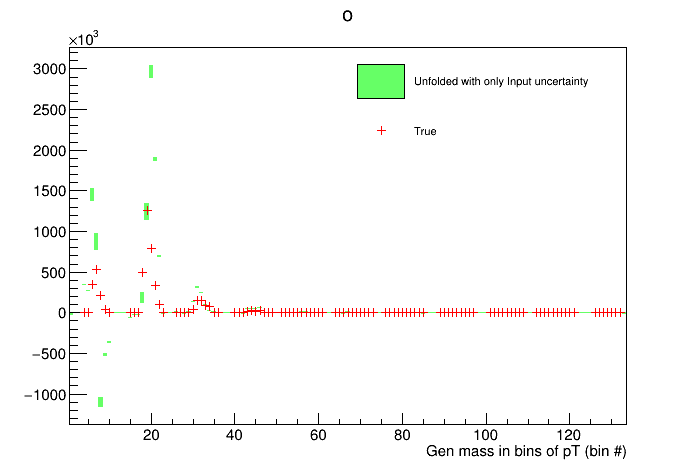

In [28]:
oInput.SetMarkerStyle(0)
oInput.SetLineColor(ROOT.kBlack)
oInput.SetFillColor(ROOT.kGreen-7)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
oInput.Draw("e2")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with only Input uncertainty"
leg.AddEntry(oInput, legstr, "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.SaveAs
#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingDataOutput_ungroomed_inputStat_allbins"+year+".png")

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfoldingOutput_ungroomed_matrixUnc_allbins2018.png has been created


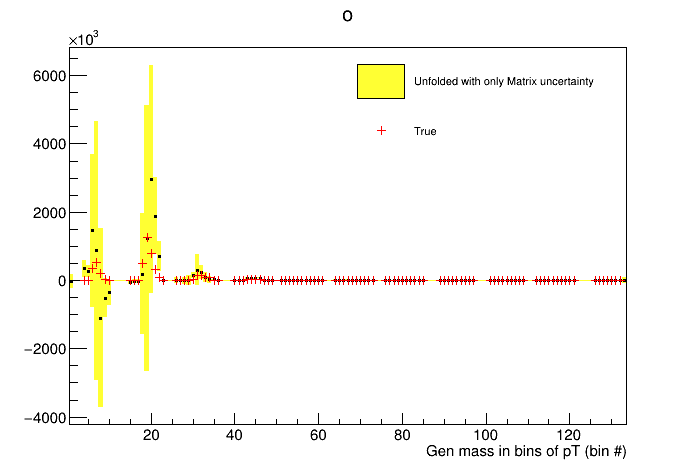

In [38]:
oMat.SetMarkerStyle(0)
oMat.SetLineColor(ROOT.kBlack)
oMat.SetFillColor(ROOT.kYellow-4)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
oMat.Draw("e2")
o.Draw("e same")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with only Matrix uncertainty"
leg.AddEntry(oMat, legstr, "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_matrixUnc_allbins"+year+".png")

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfoldingOutput_allUnc_allbins2018.png has been created


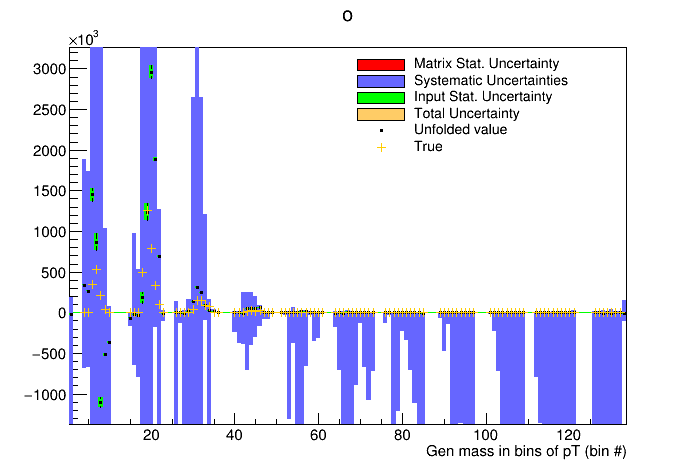

In [37]:
# def plotOutputUncPretty(o):
# oInput = o.Clone("Input stat")
# oMat = o.Clone("Matrix stat")
# oTotal  = o.Clone("Total unc")


# mCovInput = u.GetEmatrixInput("Input unc")
# mCovUncorr = u.GetEmatrixSysUncorr("Matric unc")

# for i in range(1, o.GetNbinsX()+1):
#     oInput.SetBinError(i, mCovInput.GetBinContent(i,i)**0.5 )
#     oMat.SetBinError(i, mCovUncorr.GetBinContent(i,i)**0.5 )    
#     oTotal.SetBinError(i, np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ))
oSys.SetMarkerStyle(0)
oSys.SetLineColor(ROOT.kBlack)
oSys.SetFillColor(ROOT.kBlue-7)

oInput.SetMarkerStyle(0)
oInput.SetLineColor(ROOT.kBlack)
oInput.SetFillColor(ROOT.kGreen)




oTotal.SetMarkerStyle(0)
oTotal.SetLineColor(ROOT.kBlack)
oTotal.SetFillColor(ROOT.kOrange-4)

oMat.SetMarkerStyle(0)
oMat.SetLineColor(ROOT.kBlack)
oMat.SetFillColor(ROOT.kRed)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(ROOT.kOrange)

a = ROOT.TCanvas()

o.Draw("e")
# oTotal.Draw("e2 same")
oSys.Draw("e2 same")
# oMat.Draw("e2 same")
oInput.Draw("e2 same")
o.Draw("e same")
htrue.Draw("e same")


leg = ROOT.TLegend(0.9,0.9,0.9,0.9)

leg.AddEntry(oMat, "Matrix Stat. Uncertainty", "f")
leg.AddEntry(oSys, "Systematic Uncertainties", "f")
leg.AddEntry(oInput, "Input Stat. Uncertainty", "f")
leg.AddEntry(oTotal, "Total Uncertainty", "f")
leg.AddEntry(o, "Unfolded value", "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_allUnc_allbins"+year+".png")

Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt0_2018.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt200_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt280_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt360_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt450_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt520_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt630_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/trijet/UngroomedUnfolded_sepUnc_pt690_2018.png has been created
Info in <TCa

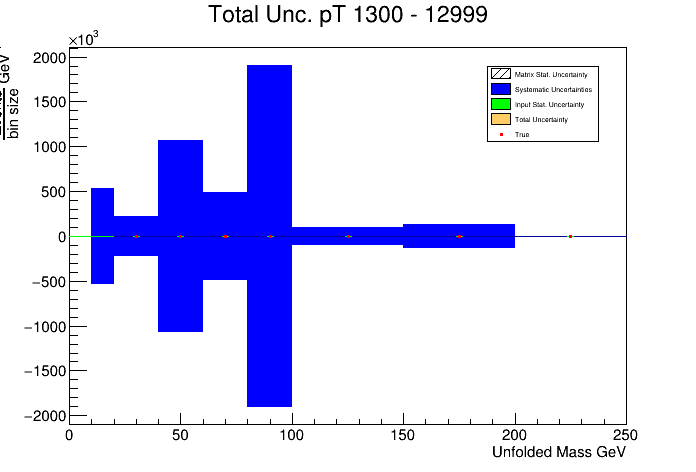

In [31]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    syscopy = ROOT.TH1D("systUncPt" + str(ipt), "Syst Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    inputcopy = ROOT.TH1D("inputUncPt" + str(ipt), "Input Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    matcopy = ROOT.TH1D("matUncPt" + str(ipt), "Matrix Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    totcopy = ROOT.TH1D("totUncPt" + str(ipt), "Total Unc. pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    htruecopy = ROOT.TH1D("hTruePt" + str(ipt), "True Gen pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
    hcopy = ROOT.TH1D("hPt" + str(ipt), "True Gen pT " + str(int(ptgen_edges[ipt])) +" - " +str(int(ptgen_edges[ipt+1])), len(mgen_edges)-1, mgen_edges)
#        hcopy.Print("all") 
    canvs = []
    for im in range(len(mgen_edges)):
        if hcopy.GetBinWidth(im) > 0:
            binsize = hcopy.GetBinWidth(im)
        else:
            binsize = 1
        syscopy.SetBinContent(im, oSys.GetPointY(im+1+ipt*(len(mgen_edges)-1))/binsize)
        syscopy.SetBinError(im, oSys.GetErrorY(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        inputcopy.SetBinContent(im, oInput.GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binsize)
        inputcopy.SetBinError(im, oInput.GetBinError(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        matcopy.SetBinContent(im, oMat.GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binsize)
        matcopy.SetBinError(im, oMat.GetBinError(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        totcopy.SetBinContent(im, oTotal.GetPointY(im+1+ipt*(len(mgen_edges)-1))/binsize)
        totcopy.SetBinError(im, oTotal.GetErrorY(im+1+ipt*(len(mgen_edges)-1))/binsize) 
        hcopy.SetBinContent(im, htrue.GetBinContent(im+1+ipt*(len(mgen_edges)-1))/binsize)
        hcopy.SetBinError(im, htrue.GetBinError(im+1+ipt*(len(mgen_edges)-1))/binsize)
    syscopy.SetMarkerStyle(0)
    syscopy.SetLineColor(ROOT.kBlack)
    syscopy.SetFillColor(ROOT.kBlue)
    inputcopy.SetMarkerStyle(0)
    inputcopy.SetLineColor(ROOT.kBlack)
    inputcopy.SetFillColor(ROOT.kGreen)
    matcopy.SetMarkerStyle(0)
    matcopy.SetLineColor(ROOT.kBlack)
    matcopy.SetFillStyle(3354)
    matcopy.SetFillColor(ROOT.kBlack)
    totcopy.SetMarkerStyle(0)
    totcopy.SetLineColor(ROOT.kBlack)
    totcopy.SetFillColor(ROOT.kOrange-4)
    hcopy.SetMarkerStyle(7)
    hcopy.SetMarkerColor(2)
    totcopy.GetXaxis().SetTitle("Unfolded Mass GeV")
    totcopy.GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}") 
    totcopy.GetXaxis().SetRange(1,totcopy.GetNbinsX()-1)
    totcopy.Draw("e2")
    syscopy.Draw("e2 same") 
    inputcopy.Draw("e2 same")
    matcopy.Draw("e2 same")
    hcopy.Draw("e same")
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(matcopy, "Matrix Stat. Uncertainty", "f")
    leg1.AddEntry(syscopy, "Systematic Uncertainties", "f")
    leg1.AddEntry(inputcopy, "Input Stat. Uncertainty", "f")
    leg1.AddEntry(totcopy, "Total Uncertainty", "f")
    leg1.AddEntry(hcopy, "True", "p")
    leg1.Draw()
    # ci.SetLogy()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"Unfolded_sepUnc_pt"+str(int(ptgen_edges[ipt]))+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
    ci.Show()

In [32]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    inputcopy = ROOT.TH1D("inputUncPt" + str(ipt), "Input Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    matcopy = ROOT.TH1D("matUncPt" + str(ipt), "Matrix Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    syscopy = ROOT.TH1D("systUncPt" + str(ipt), "Syst Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    totcopy = ROOT.TH1D("totUncPt" + str(ipt), "Total Unc. pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    htruecopy = ROOT.TH1D("hTruePt" + str(ipt), "True Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    # hcopy = ROOT.TH1D("hPt" + str(ipt), "Unfolded pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
#        hcopy.Print("all") 
    canvs = []
    hists =       [syscopy,   totcopy,        inputcopy, matcopy,    htruecopy]
    histsrcs =    [oSys,      oTotal,         oInput,    oMat,       htrue]
    markerstyle = [0,         0,              0,         0,          7,         7]
    fillcolor =   [ROOT.kBlue,ROOT.kOrange-4,ROOT.kGreen,ROOT.kBlack,2,ROOT.kBlack]
    fillstyle =   [None,      None,         None,       3354,       None,         None]
    linecolor = [ROOT.kBlack, ROOT.kBlack, ROOT.kBlack, ROOT.kBlack, None, None]
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)  
    for i in range(0, 2):
        print(hists[i].GetName())
        for im in range(len(mgen_edges)):
            if hists[i].GetBinWidth(im)>0:   
                hists[i].SetPointY(im, histsrcs[i].GetPointY(im+1+ipt*(len(mgen_edges)-1))/hist.GetBinWidth(im))
                hists[i].SetErrorY(im, histsrcs[i].GetErrorY(im+1+ipt*(len(mreco_edges)-1))/hist.GetBinWidth(im))
            else:  
                hists[i].SetPointY(im, histsrcs[i].GetPointY(im+1+ipt*(len(mgen_edges)-1)))
                hists[i].SetErrorY(im, histsrcs[i].GetErrorY(im+1+ipt*(len(mgen_edges)-1))) 
        hists[i].SetMarkerStyle(markerstyle[i])
        hists[i].SetMarkerColor(fillcolor[i])
        hists[i].SetFillColor(fillcolor[i])
        if linecolor[i]!=None:
            hists[i].SetLineColor(linecolor[i])
        if fillstyle[i]!=None:
            hists[i].SetFillStyle(fillstyle[i])
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
        hists[i].GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}")
        if i == 0:
            hists[i].Draw("e2")    
        else:
            hists[i].Draw("e2 same") 
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
    for i in range(2, len(hists)):
        for im in range(len(mgen_edges)):
            if hists[i].GetBinWidth(im)>0:   
                hists[i].SetBinContent(im, histsrcs[i].GetBinContent(im+1+ipt*(len(mgen_edges)-1))/hist.GetBinWidth(im))
                hists[i].SetBinError(im, histsrcs[i].GetBinError(im+1+ipt*(len(mreco_edges)-1))/hist.GetBinWidth(im))
            else:  
                hists[i].SetBinContent(im, histsrcs[i].GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
                hists[i].SetBinError(im, histsrcs[i].GetBinError(im+1+ipt*(len(mgen_edges)-1))) 
        hists[i].SetMarkerStyle(markerstyle[i])
        hists[i].SetMarkerColor(fillcolor[i])
        hists[i].SetFillColor(fillcolor[i])
        if linecolor[i]!=None:
            hists[i].SetLineColor(linecolor[i])
        if fillstyle[i]!=None:
            hists[i].SetFillStyle(fillstyle[i])
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
        hists[i].GetYaxis().SetTitle("#frac{Events}{bin size} GeV^{-1}")
        if i == 0:
            hists[i].Draw("e2")    
        else:
            hists[i].Draw("e2 same") 
        hists[i].GetXaxis().SetTitle("Unfolded Mass GeV")
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(matcopy, "Matrix Stat. Uncertainty", "f")
    leg1.AddEntry(syscopy, "Systematic Uncertainties", "f")
    leg1.AddEntry(inputcopy, "Input Stat. Uncertainty", "f")
    leg1.AddEntry(totcopy, "Total Uncertainty", "f")
    leg1.AddEntry(hcopy, "True", "p")
    leg1.Draw()
    # ci.SetLogy()
    ci.Draw()                                                                                                                                        
    # ci.SaveAs(os_path+"UnfoldedClosure_ungroomed_sepUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)

systUncPt0


AttributeError: 'TH1D' object has no attribute 'SetPointY'

In [ ]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "InputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
#        hcopy.Print("all") 
    canvs = []
    hists = []
    for im in range(len(mgen_edges)):
        hcopy.SetBinContent(im, o.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
    hcopy.SetLineColor(ROOT.kBlue)
    hcopy.SetMarkerColor(ROOT.kBlue)
    hcopy.GetXaxis().SetTitle("Gen Mass GeV")
    hcopy.GetXaxis().SetRange(1,totcopy.GetNbinsX()-1)
    hcopy.Draw()                                                                                                                           
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.Draw()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"Unfolded_allUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)

In [ ]:
oSysFrac = o.Clone("Fractional")
oInputFrac = o.Clone("Fractiona inputl")
oMatFrac = o.Clone("Fractional matrix")
oTotalFrac = o.Clone("Fractional total")
for i in range(1, o.GetNbinsX()+1):
    oSysFrac.SetBinContent(i, 1)
    oInputFrac.SetBinContent(i, 1)
    oMatFrac.SetBinContent(i, 1)
    oTotalFrac.SetBinContent(i, 1)
    if o.GetBinContent(i) <0.01:
        oSysFrac.SetBinError(i, 0)
        oInputFrac.SetBinError(i, 0 )
        oMatFrac.SetBinError(i, 0)
        oTotalFrac.SetBinError(i, 0)
    else:
        oSysFrac.SetBinError(i, oSys.GetBinError(i)/o.GetBinContent(i))
        oInputFrac.SetBinError(i, oInput.GetBinError(i)/o.GetBinContent(i))
        oMatFrac.SetBinError(i, oMat.GetBinError(i)/o.GetBinContent(i))
        oTotalFrac.SetBinError(i, oTotal.GetBinError(i)/o.GetBinContent(i))

In [ ]:
oSysFrac.SetMarkerStyle(0)
oSysFrac.SetLineColor(ROOT.kBlack)
oSysFrac.SetFillColor(ROOT.kBlue-7)
oSysFrac.SetFillColorAlpha(ROOT.kBlue, 1)
oSysFrac.SetFillStyle(3004)

oInputFrac.SetMarkerStyle(0)
oInputFrac.SetLineColor(ROOT.kBlack)
#oInputFrac.SetFillStyle(3000)
oInputFrac.SetFillColorAlpha(ROOT.kGreen, 0.5)





oTotalFrac.SetMarkerStyle(0)
oTotalFrac.SetLineColor(ROOT.kBlack)
oTotalFrac.SetFillColorAlpha(ROOT.kOrange-4, 0.5)

oMatFrac.SetMarkerStyle(0)
oMatFrac.SetLineColor(ROOT.kBlack)

oMatFrac.SetFillColorAlpha(ROOT.kRed, 1)


htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()



oMatFrac.Draw("e2 same")
oInputFrac.Draw("e2 same")

leg = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)

leg.AddEntry(oMatFrac, "Matrix Stat. Uncertainty", "f")
leg.AddEntry(oSysFrac, "Systematic Uncertainties", "f")
leg.AddEntry(oInputFrac, "Input Stat. Uncertainty", "f")
leg.AddEntry(oTotalFrac, "Total Uncertainty", "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_fracErr_allbins"+year+".png")

In [ ]:
for i in range(60,70):
    print(i)
    print("Value: ",oSys.GetBinContent(i))
    print("Error: ",oInput.GetBinError(i))

In [ ]:
from ROOT import kBlack, kBlue, kRed, kGreen, kYellow, kMagenta, kCyan, kOrange, kGray

color_list = []
base_colors = [kBlack, kBlue, kRed, kGreen, kYellow, kMagenta, kCyan, kOrange]

# Loop and alternate base colors with lighter/darker shades
for i in range(30):
    index = i % len(base_colors)  # Cycle through base colors
    color = base_colors[index]
    if i % 2 == 0:  # Lighter shade for even indices
        color += 5
    else:  # Darker shade for odd indices
        color -= 5
    color_list.append(color)

In [ ]:
for key in syst_list:
    for i in range(1, o.GetNbinsX()+1):
        systErr[key].SetBinContent(i, abs(systErr[key].GetBinContent(i)))

In [ ]:
myStack = ROOT.THStack("errStack", "Stacked Errors")
for i,key in enumerate(syst_list[::2]):
    print(key)
    systErr[key].SetLineColor(color_list[i])
    myStack.Add(systErr[key])

In [ ]:
c3 = ROOT.TCanvas()
myStack.Draw()
c3.Draw()

In [ ]:
print(u.GetSysSources())

In [ ]:
# u_test.DoUnfold(0.0)

In [ ]:
# o_test = u_test.GetOutput("jer variation test")

In [ ]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("resultPt" + str(ipt), "Output pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "OutputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
#        hcopy.Print("all") 
    for im in range(len(mgen_edges)):
        hcopy.SetBinContent(im, o.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.GetXaxis().SetTitle("Gen Mass GeV")
    hcopy.Draw()                                                                                                                           
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.Draw()
    ci.SetLogy()
    ci.Draw()                                                                                                                                        
    ci.SaveAs(os_path+"Unfolded_allUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)